In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle
import os

In [ ]:
data = pd.read_csv('/content/DATA csv.csv', header =2, skiprows = 1)

In [ ]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,мм,мм.1,мм.2,м,...,атм.10,м3/сут.9,м3/сут.10,т/сут.6,т/сут.7,м3/сут.11,м3/сут.12,т/сут.8,т/сут.9,т/сут.10
0,01.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 744,00",...,"22,00","74,35","74,35","2,18","0,10","305,07","305,07","8,96","6,78","6,87"
1,01.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 682,00",...,"22,00","81,77","81,77","0,92","0,02","296,41","296,41","3,34","2,42","2,44"
2,02.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 744,00",...,"22,00","86,63","86,63","2,22","0,16","341,29","341,29","8,73","6,51","6,67"
3,02.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 682,00",...,"22,00","95,76","95,76","0,94","0,05","334,01","334,01","3,27","2,33","2,38"
4,04.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 744,00",...,"22,00","72,50","72,50","1,58","0,16","299,29","299,29","6,52","4,94","5,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,11.2019,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"22,40","125,36","125,36","2,15","0,35","516,05","516,05","8,86","6,70","7,05"
6027,12.2018,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"22,00","155,52","155,52","2,67","0,63","604,22","604,22","10,37","7,70","8,33"
6028,12.2019,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"20,50","126,29","126,29","2,17","0,37","521,97","521,97","8,96","6,79","7,16"
6029,2019.03,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"23,00","146,58","146,58","3,77","0,79","572,69","572,69","14,74","10,97","11,76"


In [ ]:
columns = pd.read_csv('/content/DATA csv.csv').iloc[1]

In [ ]:
df = pd.read_csv('/content/DATA csv.csv', skiprows=3)
df.columns = columns
df = df.iloc[:-1]

In [ ]:
df

1,Дата,Скважина,Пласт,Куст,Цех,Тип скважины,Диаметр экспл.колонны,Диаметр НКТ,Диаметр штуцера,Глубина верхних дыр перфорации,...,ГП - Забойное давление,ГП(ИДН) Дебит жидкости,ГП(ИДН) Дебит жидкости скорр-ый,ГП(ИДН) Дебит нефти,ГП(ИДН) Прирост дефита нефти,ГП(ГРП) Дебит жидкости,ГП(ГРП) Дебит жидкости скорр-ый,ГП(ГРП) Дебит нефти,ГП(ГРП) Прирост дефита нефти,ГП - Общий прирост Qн
0,01.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 744,00",...,"22,00","74,35","74,35","2,18","0,10","305,07","305,07","8,96","6,78","6,87"
1,01.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 682,00",...,"22,00","81,77","81,77","0,92","0,02","296,41","296,41","3,34","2,42","2,44"
2,02.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 744,00",...,"22,00","86,63","86,63","2,22","0,16","341,29","341,29","8,73","6,51","6,67"
3,02.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 682,00",...,"22,00","95,76","95,76","0,94","0,05","334,01","334,01","3,27","2,33","2,38"
4,04.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 744,00",...,"22,00","72,50","72,50","1,58","0,16","299,29","299,29","6,52","4,94","5,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025,11.2018,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"21,00","144,33","144,33","2,48","0,57","591,57","591,57","10,15","7,67","8,25"
6026,11.2019,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"22,40","125,36","125,36","2,15","0,35","516,05","516,05","8,86","6,70","7,05"
6027,12.2018,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"22,00","155,52","155,52","2,67","0,63","604,22","604,22","10,37","7,70","8,33"
6028,12.2019,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"20,50","126,29","126,29","2,17","0,37","521,97","521,97","8,96","6,79","7,16"


In [ ]:
# пластовое давление
# коэф. продуктивности
# отфильтровать столбцы
# датасет для пласта
# для пласта нужно сохранить время, пластовое давление, коэффициент продуктивности, скважина

In [ ]:
names = columns.tolist()

In [ ]:
names

['Дата',
 'Скважина',
 'Пласт',
 'Куст',
 'Цех',
 'Тип скважины',
 'Диаметр экспл.колонны',
 'Диаметр НКТ',
 'Диаметр штуцера',
 'Глубина верхних дыр перфорации',
 'Удлинение',
 'Способ эксплуатации',
 'Тип насоса',
 'Производительность ЭЦН',
 'Напор',
 'Частота',
 'Коэффициент сепарации',
 'Глубина спуска',
 'Буферное давление',
 'Давление в линии',
 'Пластовое давление',
 'Динамическая высота',
 'Затрубное давление',
 'Давление на приеме',
 'Забойное давление',
 'Дебит нефти',
 'Дебит жидкости',
 'Обводненность',
 'Состояние на конец месяца',
 'Давление наcыщения',
 'Газовый фактор',
 'Температура пласта',
 'SKIN',
 'JD факт',
 'Дата ГРП',
 'Фирма ГРП',
 'Вязкость нефти в пластовых условиях',
 'Вязкость воды в пластовых условиях',
 'Вязкость жидкости в пласт. условиях',
 'объемный коэффициент',
 'Плотность нефти',
 'Плотность воды',
 'Высота перфорации',
 'Удельный коэффициент',
 'Коэффициент продуктивности',
 'ТП - Забойное давление',
 'ТП(ИДН) Дебит жидкости',
 'ТП(ИДН) Дебит жидко

In [ ]:
plast_dataset = df[["Дата", "Скважина", "Пластовое давление", "Пласт", "Коэффициент продуктивности"]].copy()

In [ ]:
f=plast_dataset["Дата"]
pust = []
for i in f:
  splitted = i.split('.')
  if len(splitted[0]) == 2:
    d = datetime.strptime(f"{splitted[0]+'.'+splitted[1]}", "%m.%Y").timestamp()
  else:
    d= datetime.strptime(f"{splitted[1]+'.'+splitted[0]}", "%m.%Y").timestamp()
  pust.append(d)
plast_dataset["Дата"] = pust
plast_dataset['Пластовое давление'] = plast_dataset['Пластовое давление'].map(lambda x: float(x.replace(',', '.')))
plast_dataset['Коэффициент продуктивности'] = plast_dataset['Коэффициент продуктивности'].map(lambda x: float(x.replace(',', '.')))

In [ ]:
plast_dataset

1,Дата,Скважина,Пластовое давление,Пласт,Коэффициент продуктивности
0,1.546301e+09,"""896Б""",209.20,БС10,0.41
1,1.546301e+09,"""896Б""",203.70,БС10,0.46
2,1.548979e+09,"""896Б""",209.20,БС10,0.48
3,1.548979e+09,"""896Б""",203.70,БС10,0.53
4,1.554077e+09,"""896Б""",207.30,БС10,0.40
...,...,...,...,...,...
6025,1.541030e+09,990,213.89,БС10,0.77
6026,1.572566e+09,990,193.00,БС10,0.76
6027,1.543622e+09,990,193.00,БС10,0.94
6028,1.575158e+09,990,195.00,БС10,0.75


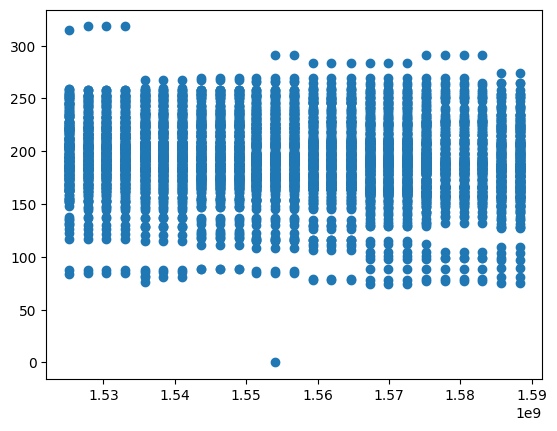

In [ ]:
plt.plot(plast_dataset["Дата"], plast_dataset['Пластовое давление'], 'o')
plt.show()

In [ ]:
#plast_dataset["Дата"].groupby("Скважина")

In [ ]:
#for i in plcopy:
#  plcopy[plcopy["Скважина"] == uniq[i]].reset_index()
#  plt.plot(plast_dataset["Дата"], plast_dataset['Пластовое давление'])

In [ ]:
plcopy = plast_dataset.copy()

In [ ]:
plcopy[plcopy["Скважина"] == uniq[0]]

NameError: name 'uniq' is not defined

In [ ]:
plast = plcopy.groupby(['Дата', 'Скважина','Пласт']).mean().reset_index().copy()

In [ ]:
plast

1,Дата,Скважина,Пласт,Пластовое давление,Коэффициент продуктивности
0,1.525133e+09,1000,БС10,182.50,1.90
1,1.525133e+09,1002,БС10,190.20,7.78
2,1.525133e+09,1015,БС10,253.70,0.00
3,1.525133e+09,1039,БС10,207.80,3.04
4,1.525133e+09,105,БС10,201.80,1.12
...,...,...,...,...,...
4394,1.588291e+09,912,БС10,230.70,0.24
4395,1.588291e+09,95,БС10,230.99,0.49
4396,1.588291e+09,971,БС10,156.99,1.08
4397,1.588291e+09,987,БС10,176.09,0.82


In [ ]:
uniq = plast_dataset["Скважина"].unique()
uniqq = plast["Скважина"].unique()
len(uniqq) == len(uniq)

True

In [ ]:
plast_ = plast.drop(['Пласт'], axis=1).copy()

In [ ]:
plast_

1,Дата,Скважина,Пластовое давление,Коэффициент продуктивности
0,1.525133e+09,1000,182.50,1.90
1,1.525133e+09,1002,190.20,7.78
2,1.525133e+09,1015,253.70,0.00
3,1.525133e+09,1039,207.80,3.04
4,1.525133e+09,105,201.80,1.12
...,...,...,...,...
4394,1.588291e+09,912,230.70,0.24
4395,1.588291e+09,95,230.99,0.49
4396,1.588291e+09,971,156.99,1.08
4397,1.588291e+09,987,176.09,0.82


In [ ]:
plast_.groupby(['Скважина']).mean().reset_index()

1,Скважина,Дата,Пластовое давление,Коэффициент продуктивности
0,"""896Б""",1.558944e+09,210.197222,0.545000
1,1000,1.556752e+09,188.711200,1.919600
2,1002,1.556752e+09,190.827600,7.064800
3,1015,1.556752e+09,228.840400,0.000000
4,1024,1.559385e+09,186.545217,3.409130
...,...,...,...,...
197,912,1.583050e+09,230.700000,0.306667
198,95,1.556752e+09,228.063200,0.303600
199,971,1.556752e+09,180.175200,0.856800
200,987,1.581754e+09,208.696667,0.970000


In [ ]:
X = plast_['Дата']
y = plast_.drop(['Дата'], axis = 1)

In [ ]:
models_list={}
for i in uniqq:
  df_temp = plast_[plast_['Скважина'] == i][['Дата','Пластовое давление','Коэффициент продуктивности']]
  if len(df_temp)< 10:
    continue

  X, y = df_temp['Дата'], df_temp[['Пластовое давление', 'Коэффициент продуктивности']]
  X = X.array.reshape(len(X), 1)
  X = np.asarray(X, dtype='float64')
  y = np.asarray(y, dtype='float64')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
  model=LinearRegression()
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  models_list[i]=model

In [ ]:
def make_ipr(kro, Pzab):
  pressure=int(input())
  return -kro*pressure+Pzab

In [ ]:
pred_date = input()
pred_date = np.array(datetime.strptime(f"{pred_date}", "%m.%Y").timestamp()).reshape(1,1)
pred = models_list['1000'].predict(pred_date)
pred

04.2024


array([[186.91481409,   1.91253672]])

In [ ]:
make_ipr(pred[0][1], pred[0][0])

100


-4.3388578250473415

In [ ]:
os.mkdir("models")
for i in models_list:
  with open (f'models/{i}', 'wb') as file:
    pickle.dump(models_list[i], file)

In [ ]:
class plast_predict_IPR():
  def __init__(self, date, well, Pzab):
    self.well = well
    self.date = date
    self.Pzab = Pzab

    with open (f"models/{self.well}", 'rb') as model:
      self.models = pickle.load(model)

  def predict(self):
    pred_date = np.array(datetime.strptime(self.date, "%d.%m.%Y").timestamp()).reshape(-1,1)
    pred = models_list[self.well].predict(pred_date)
    Pplast = pred[0][0]
    kro = pred[0][1]
    return self.make_IPR(Pplast, kro)

  def make_IPR(self, kro, Pplast):
    make_IPR = -kro*self.Pzab+Pplast
    return make_IPR

In [ ]:
sample = plast_predict_IPR('01.01.2024', '1000', 10)
sample.predict()

-1868.3015247878309

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

shutil.move("/content/models", "/content/drive/MyDrive/models")


'/content/drive/MyDrive/models'